In [1]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt

In [2]:
# Authenticating Twitter APIs

consumerKey = 'HCuB1UuD9heAdoWsCVuLnsblG'
consumerSecret = 'rONrnsWQFqLPNNAakJUTjt7RXEvZJ3TfKARLC8LZNtNcUzKJKZ'
accessToken = '1360126526486839297-IARMxAWh6bzlILHhob33uJxVtJgY56'
accessTokenSecret = 'f1CnP4YpKJdAUbGHPpAkBGEvPXbU6IfxsPRR08l9GTt1A'


auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [3]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Enter the Keyword: ")

TweetNum = 100
tweets = tweepy.Cursor(api.search, q=keyword).items(TweetNum)

positive  = 0
negative = 0
neutral = 0
polarity = 0

for tweet in tweets:
    analysis = TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity
    
    asp = analysis.sentiment.polarity
    
    if (asp == 0):
        neutral += 1
        
    
    elif (asp < 0.00):
        negative += 1
       
    
    elif (asp > 0.00):
        positive += 1
        

positive = percentage(positive, TweetNum)
negative = percentage(negative, TweetNum)
neutral = percentage(neutral, TweetNum)
polarity = percentage(polarity, TweetNum)

positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Enter the Keyword: school


In [4]:
# Output in text format

print("The Sentiment associated with the keyword ",keyword," is:\nPositive by ",positive,"%",sep="")
print("Negative by ",negative,"%",sep="")
print("Neutral by ",neutral,"%",sep="")

The Sentiment associated with the keyword school is:
Positive by 48.0%
Negative by 15.0%
Neutral by 37.0%


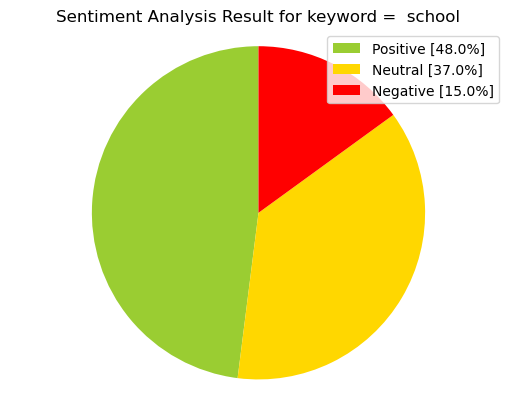

In [6]:
# Output in piechart format

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'gold','red']

patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(patches, labels, loc='best')
plt.title("Sentiment Analysis Result for keyword =  "+keyword+"" )
plt.axis('equal')
plt.show()